# Import

In [21]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
file_path = 'C:/Users/acpos/Desktop/Inatel/ProjetoC111/vgsales.csv'
df = pd.read_csv(file_path, encoding='MacRoman')
# Remover linhas com valores ausentes nas colunas importantes
df.dropna(subset=["Platform", "Name", "Global_Sales", "Year"], inplace=True)
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# Pergunta 1: Qual foi o jogo mais vendido de todos os tempos(por cada plataforma)?

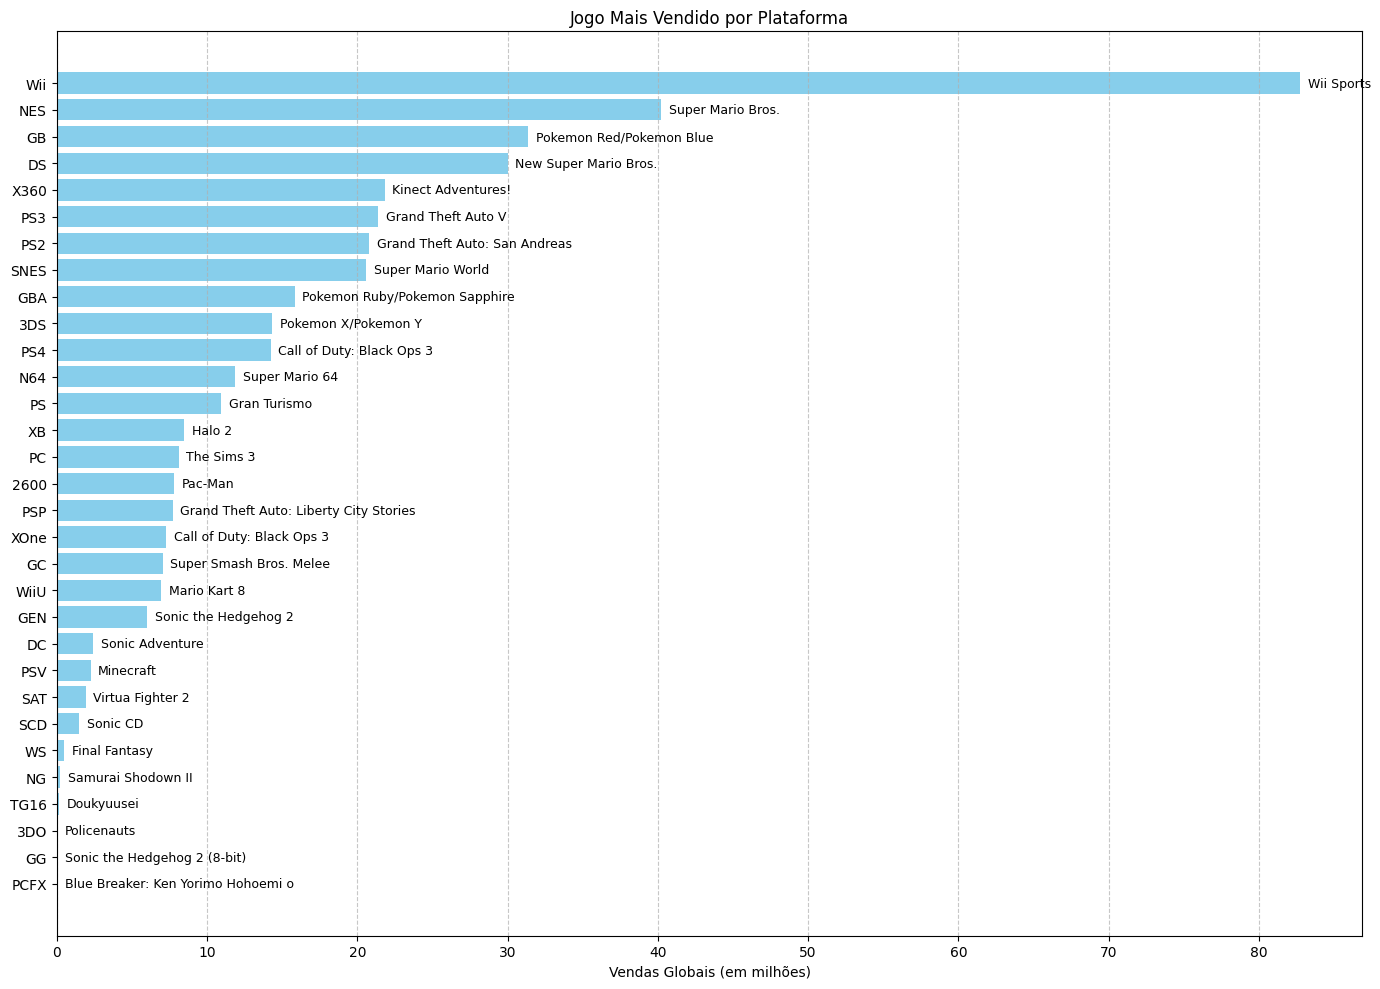

In [7]:
top_games_by_platform = df.loc[df.groupby("Platform")["Global_Sales"].idxmax()]
result = top_games_by_platform[["Platform", "Name", "Global_Sales"]].sort_values(by="Global_Sales", ascending=False)

plt.figure(figsize=(14, 10))
bars = plt.barh(result["Platform"], result["Global_Sales"], color="skyblue")
plt.xlabel("Vendas Globais (em milhões)")
plt.title("Jogo Mais Vendido por Plataforma")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)

for bar, name in zip(bars, result["Name"]):
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height() / 2,
             name, va='center', fontsize=9)

plt.tight_layout()
plt.show()

# Pergunta 2: Qual publisher tem mais sucesso (por região)?

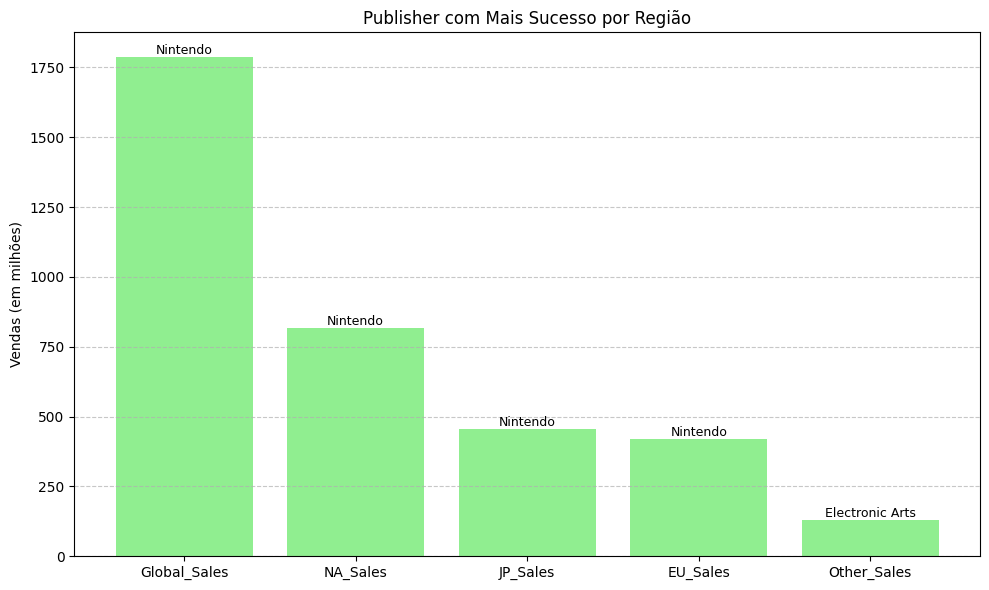

In [11]:
sales_by_publisher = df.groupby("Publisher")[["Global_Sales", "NA_Sales", "JP_Sales", "EU_Sales", "Other_Sales"]].sum()

top_publishers_by_region = {
    region: sales_by_publisher[region].idxmax()
    for region in sales_by_publisher.columns
}

top_sales_by_region = {
    region: sales_by_publisher.loc[publisher, region]
    for region, publisher in top_publishers_by_region.items()
}

regions = list(top_publishers_by_region.keys())
publishers = [top_publishers_by_region[region] for region in regions]
sales = [top_sales_by_region[region] for region in regions]

plt.figure(figsize=(10, 6))
bars = plt.bar(regions, sales, color="lightgreen")
plt.title("Publisher com Mais Sucesso por Região")
plt.ylabel("Vendas (em milhões)")
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar, publisher in zip(bars, publishers):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, publisher,
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Pergunta 3: Qual gênero tem mais sucesso (por região)?

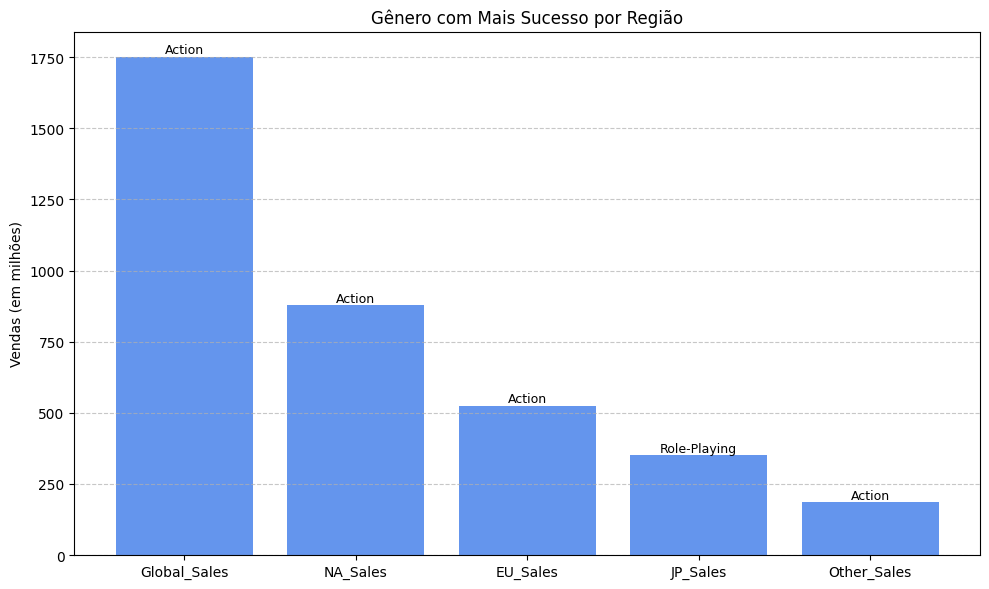

In [14]:
sales_by_genre = df.groupby("Genre")[["Global_Sales", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum()

top_genres_by_region = {
    region: sales_by_genre[region].idxmax()
    for region in sales_by_genre.columns
}

top_sales_by_region = {
    region: sales_by_genre.loc[genre, region]
    for region, genre in top_genres_by_region.items()
}

regions = list(top_genres_by_region.keys())
genres = [top_genres_by_region[region] for region in regions]
sales = [top_sales_by_region[region] for region in regions]

plt.figure(figsize=(10, 6))
bars = plt.bar(regions, sales, color="cornflowerblue")
plt.title("Gênero com Mais Sucesso por Região")
plt.ylabel("Vendas (em milhões)")
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar, genre in zip(bars, genres):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, genre,
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Pergunta 4: Qual publisher teve mais sucesso (por ano e mostrar jogo mais vendido no ano, para melhor compreensão)?

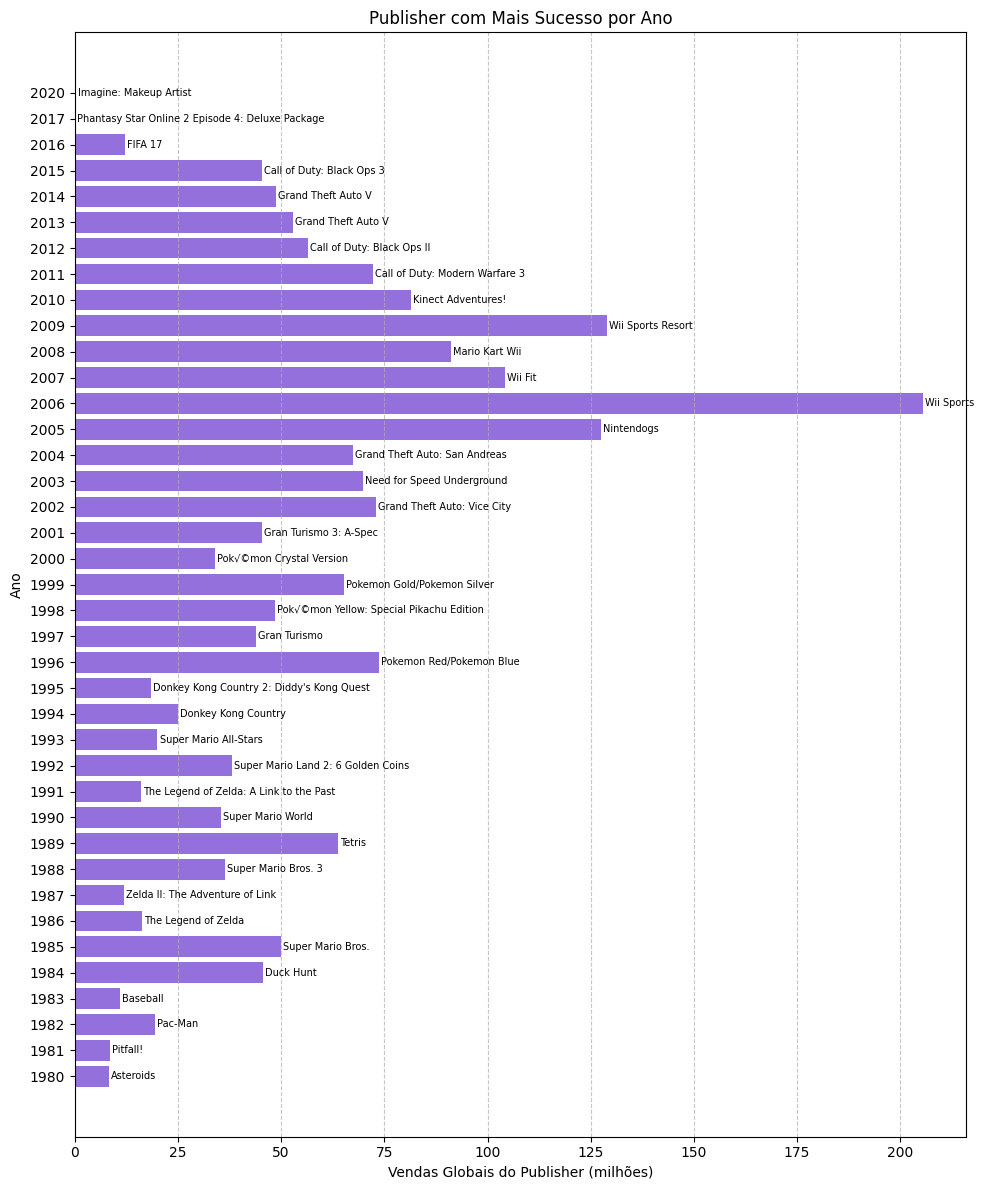

In [22]:
df['Year'] = df['Year'].astype(int)
publisher_sales_per_year = df.groupby(["Year", "Publisher"])["Global_Sales"].sum().reset_index()
top_publishers_by_year = publisher_sales_per_year.loc[publisher_sales_per_year.groupby("Year")["Global_Sales"].idxmax()]
top_games_by_year = df.loc[df.groupby("Year")["Global_Sales"].idxmax()][["Year", "Name", "Global_Sales"]]

merged_result = pd.merge(top_publishers_by_year, top_games_by_year, on="Year", suffixes=("_Publisher", "_TopGame"))

plt.figure(figsize=(10, 12))
bars = plt.barh(merged_result["Year"].astype(str), merged_result["Global_Sales_Publisher"], color="mediumpurple")
plt.xlabel("Vendas Globais do Publisher (milhões)")
plt.ylabel("Ano") 
plt.title("Publisher com Mais Sucesso por Ano")

for bar, game in zip(bars, merged_result["Name"]):
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, game,
             ha='left', va='center', fontsize=7)

plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)  
plt.show()